In [354]:
import numpy as np
from helpers import *

In [355]:
day = '28'
month = '02'
year = '2024'

btc_path = f'/home/elantonino/Big data project/btc_parquet_data/{year}/{month}/BTCUSDT-1s-{year}-{month}-{day}.parquet'
eth_path = f'/home/elantonino/Big data project/eth_parquet_data/{year}/{month}/ETHUSDT-1s-{year}-{month}-{day}.parquet'

In [356]:
btc_data = load_parquet(btc_path)
btc_data.head()

,Open time,Open
0,2024-02-28 00:00:00,57037.35
1,2024-02-28 00:00:01,57037.35
2,2024-02-28 00:00:02,57037.35
3,2024-02-28 00:00:03,57037.35
4,2024-02-28 00:00:04,57037.35


In [357]:
eth_data = load_parquet(eth_path)
eth_data.head()

,Open time,Open
0,2024-02-28 00:00:00,3242.35
1,2024-02-28 00:00:01,3242.54
2,2024-02-28 00:00:02,3242.54
3,2024-02-28 00:00:03,3242.54
4,2024-02-28 00:00:04,3242.69


In [358]:
# t = 5*60
# base_time = 36000

btc_prices = btc_data['Open']
eth_prices = eth_data['Open']
btc_prices_std = standardize(btc_prices)
eth_prices_std = standardize(eth_prices)

In [359]:
btc_prices_std

array([-1.24458957, -1.24458957, -1.24458957, ...,  1.75639165,
        1.75639165,  1.75638609])

In [360]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [361]:
from thermal_optimal_path.lattice import partition_function
from thermal_optimal_path.statistics import average_path

In [362]:
temperature = 0.1
minute = 40  
base_time = 0
total = len(btc_prices_std)
# total = 1

df_avg = []
weights = np.exp(np.linspace(0, 2, minute))  
weights /= weights.sum()
for i in range(total-minute):
    end_time = i + minute
    btc = btc_prices_std[i:end_time]
    eth = eth_prices_std[i:end_time]

    g = partition_function(btc, eth, temperature)
    avg_path = average_path(g)[::2]
    weighted_avg = np.dot(avg_path, weights)
    df_avg.append(weighted_avg)

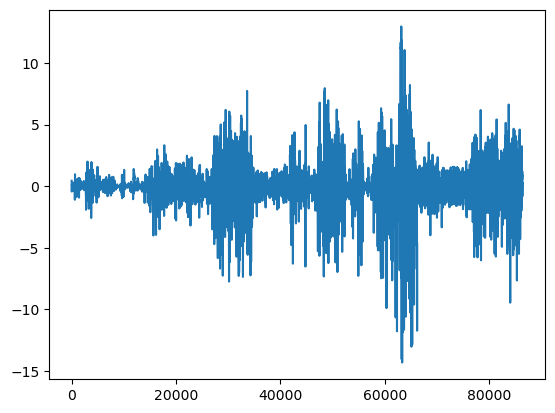

In [363]:
plt.plot(df_avg)

In [364]:
btc_prices.head(5)

0    57037.35
1    57037.35
2    57037.35
3    57037.35
4    57037.35
Name: Open, dtype: float64

In [365]:
btc_prices.pct_change().rolling(window=5).mean().head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    0.000000
6    0.000000
7    0.000016
8    0.000016
9   -0.000024
Name: Open, dtype: float64

In [366]:
btc_returns = btc_prices.pct_change().rolling(window=5).mean()[minute:]
eth_returns = eth_prices.pct_change().rolling(window=5).mean()[minute:]

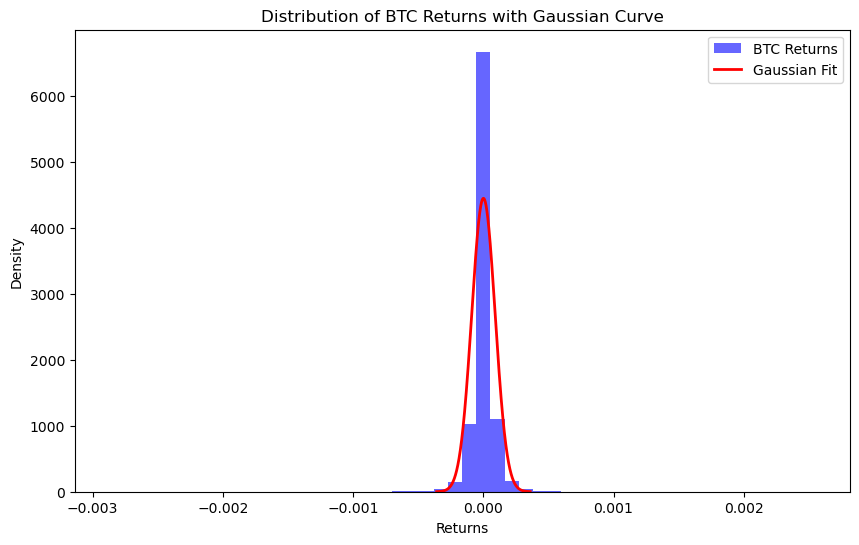

In [367]:
from scipy.stats import norm
plt.figure(figsize=(10, 6))
plt.hist(btc_returns, bins=50, density=True, alpha=0.6, color='blue', label='BTC Returns')

mean = np.mean(btc_returns)
std = np.std(btc_returns)
x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
gaussian_curve = norm.pdf(x, mean, std)
plt.plot(x, gaussian_curve, color='red', linewidth=2, label='Gaussian Fit')

plt.title('Distribution of BTC Returns with Gaussian Curve')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

In [368]:
print(np.percentile(btc_returns, 5))
print(np.percentile(eth_returns, 5))

-0.00011115945623722978
-0.00010403368269336633


In [369]:
print(np.percentile(btc_returns, 95))
print(np.percentile(eth_returns, 95))

0.00011442584426829894
0.00010604654329636545


In [370]:
len(btc_returns)

86360

In [371]:
len(df_avg)

86360

In [372]:
from strategies import basic_strategy

In [373]:
basic_strategy(btc_prices[minute:], btc_returns, eth_prices[minute:], eth_returns, df_avg)

Long BTC, price: 63718.65, total money: -1, i: 62047
Sold BTC at price: 63666.52, total money: -0.0008181278165811934, i: 62048
Short BTC, price: 60426.1, total money: 0.9991818721834188, i: 63199
Bought back BTC at price: 60404.01, total money: -0.00045255730979698594, i: 63200
Short BTC, price: 60397.4, total money: 0.999547442690203, i: 63201
Bought back BTC at price: 60472.0, total money: -0.0016877098163617932, i: 63203
Long BTC, price: 60426.0, total money: -1.0016877098163617, i: 63204
Sold BTC at price: 60466.0, total money: -0.0010257431132867367, i: 63205
Long BTC, price: 60615.8, total money: -1.0010257431132867, i: 63275
Sold BTC at price: 60509.62, total money: -0.002777431616944215, i: 63276
Long BTC, price: 60517.25, total money: -1.0027774316169442, i: 63277
Sold BTC at price: 60557.03, total money: -0.0021200983772480253, i: 63278
Short BTC, price: 60552.46, total money: 0.997879901622752, i: 63283
Bought back BTC at price: 60601.96, total money: -0.0029375713585273466